In [560]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]

In [561]:
jobs = pd.read_csv('./data/2019-03-15_jobs.csv', header = 0)

In [1186]:
rejects = pd.read_csv('./data/2019-03-15_rejects.csv', header = 0)
reject_details = pd.read_csv('./data/2019-03-15_reject_details.csv', header = 0)

In [1194]:
rejects = reject_details.merge(rejects.rename(columns = {'id': 'reject_id'}), on = 'reject_id', how = 'left')

In [954]:
# \s(\r\n|\r|\n)+
# [^,]\"[^,\s]
# \\\"(?<=[^,\s])
# , comma in Quotes "just passing time while I wait on my digivice.lso I'm trash so there's that."Just because you're trash, doesn't mean you can't do great things. It's called a garbage can, not a garbage cannot.\" - Oscar the grouch probably,robably not."

users = pd.read_csv('./data/2019-03-15_users.csv')

In [955]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12715 entries, 0 to 12714
Data columns (total 39 columns):
user_id                   12715 non-null int64
birthday                  12590 non-null object
gender                    12715 non-null object
photo_count               12715 non-null int64
profile_score             10288 non-null float64
profile_tier              10288 non-null object
bio                       1823 non-null object
characters                3273 non-null object
height                    12467 non-null float64
body_type                 12456 non-null object
blood_type                2945 non-null object
education                 12280 non-null object
school                    1010 non-null object
job                       12427 non-null object
company                   955 non-null object
religion                  12425 non-null object
smoking                   12421 non-null object
drinking                  12424 non-null object
region                    12478 n

In [956]:
users = users.replace('NULL', np.nan)

In [957]:
users['birthday'] = pd.to_datetime(users.birthday, errors = 'coerce')

In [958]:
users['age'] = 2019 - pd.DatetimeIndex(users.birthday).year
users.loc[users.age >= 100, 'age'] = -1
users['age'] = users.age.fillna(-1)

In [959]:
users['account_created_day'] = pd.DatetimeIndex(users.account_created_at).day
users['account_created_weekday'] = pd.DatetimeIndex(users.account_created_at).weekday
users['account_created_hour'] = pd.DatetimeIndex(users.account_created_at).hour

In [960]:
users['created_to_complete_seconds'] = (pd.DatetimeIndex(users.rating_completed_at) - pd.DatetimeIndex(users.account_created_at)).seconds

In [824]:
(pd.DatetimeIndex(users.admin_confirmed_at) - pd.DatetimeIndex(users.account_created_at)).seconds

Float64Index([ 974.0, 1488.0,  492.0,  817.0,  444.0,  400.0,  403.0,  542.0,
               525.0,  965.0,
              ...
               402.0, 2010.0,  284.0,  779.0,  643.0,  599.0,  601.0,  589.0,
               336.0,  270.0],
             dtype='float64', length=12715)

In [961]:
users['created_to_confirm_seconds'] = (pd.DatetimeIndex(users.admin_confirmed_at) - pd.DatetimeIndex(users.account_created_at)).seconds
users['confirm_to_complete_seconds'] = (pd.DatetimeIndex(users.stage_updated_at) - pd.DatetimeIndex(users.admin_confirmed_at)).seconds
users['created_to_complete_seconds'] = (pd.DatetimeIndex(users.stage_updated_at) - pd.DatetimeIndex(users.account_created_at)).seconds

In [962]:
reject_counts = pd.DataFrame(rejects.groupby('user_id')['id'].agg(len))
reject_counts = reject_counts.rename(columns = {'id': 'reject_counts'}).reset_index()

In [963]:
users = users.merge(reject_counts, how = 'left', on = 'user_id')

In [967]:
users = users.astype({'age': 'int32', 'account_created_day': 'int32', 
                      'account_created_weekday': 'int32', 'account_created_hour': 'int32'}, errors = 'ignore')

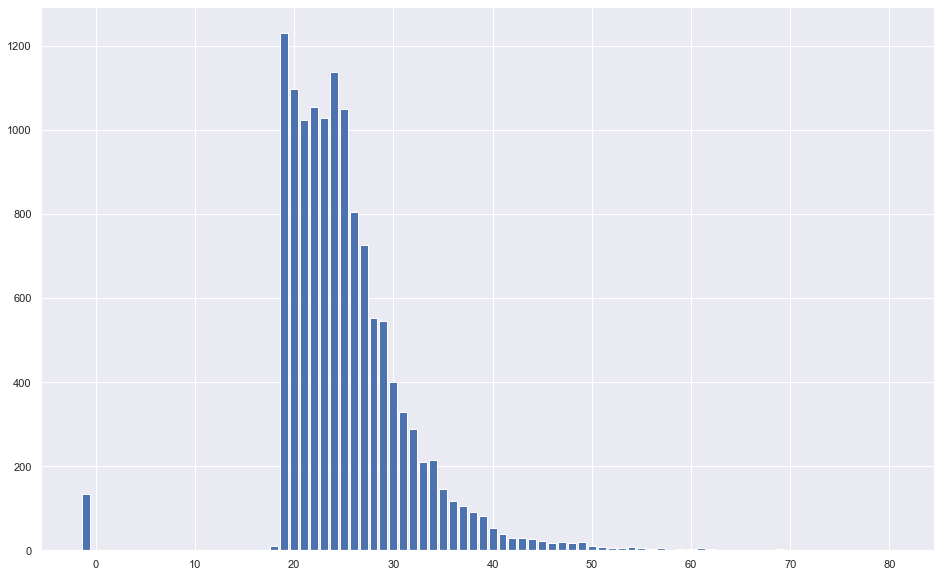

In [968]:
y = users.age.value_counts()
x = y.index

plt.bar(x, y)
plt.show()

In [969]:
users.profile_score.describe()

count    10288.000000
mean        68.274002
std         12.255224
min         31.570000
25%         59.775000
50%         69.310000
75%         77.045000
max        100.000000
Name: profile_score, dtype: float64

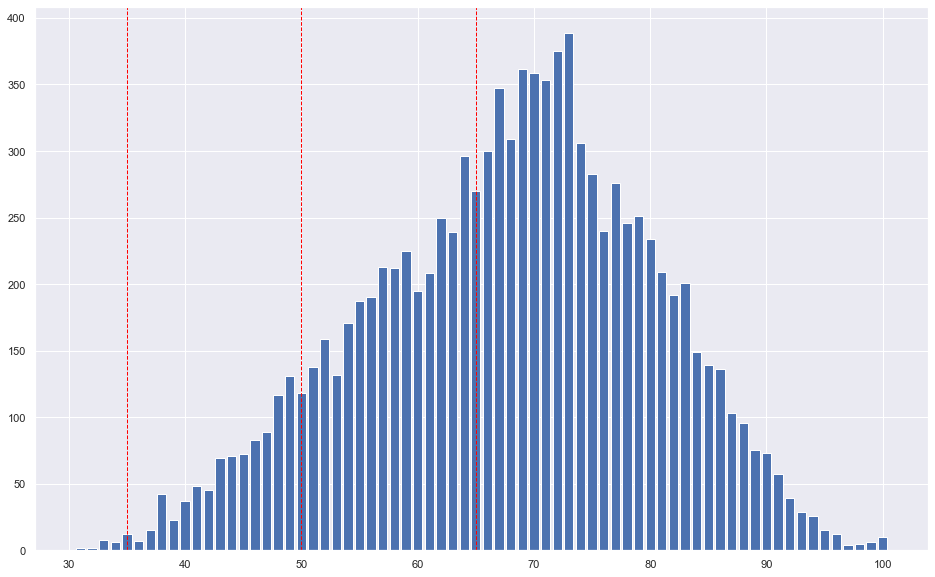

In [976]:
y = np.floor(users.profile_score).value_counts()
x = y.index

plt.bar(x, y)
plt.axvline(65, color='red', linestyle='dashed', linewidth=1)
plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
plt.axvline(35, color='red', linestyle='dashed', linewidth=1)
plt.show()

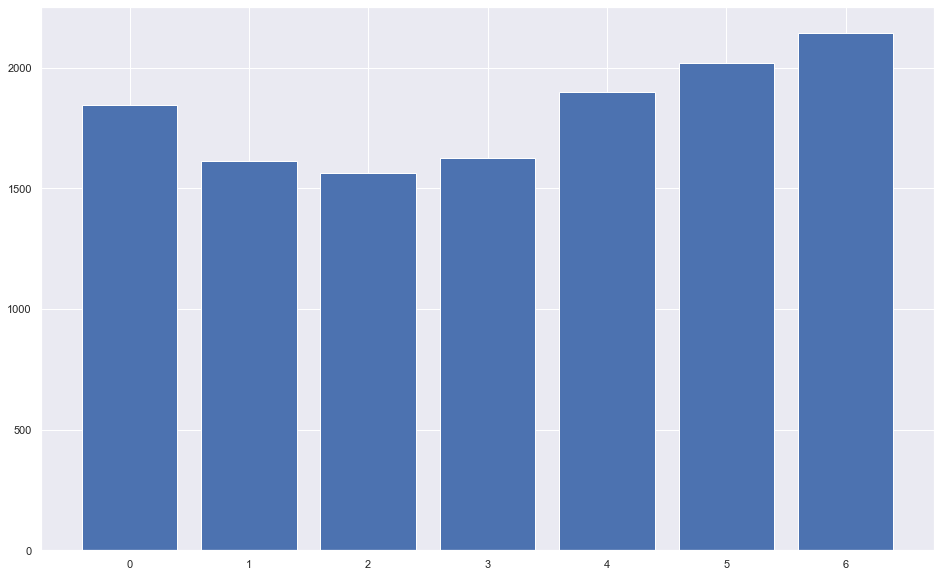

In [977]:
y = users.account_created_weekday.value_counts()
x = y.index

plt.bar(x, y)
plt.show()

In [978]:
account_created_by_time = users.groupby(['account_created_weekday','account_created_hour'])['user_id'].agg(len).unstack().T
account_created_by_time.columns = ['M', 'Tu', 'W', 'Th', 'F', 'S', 'S']

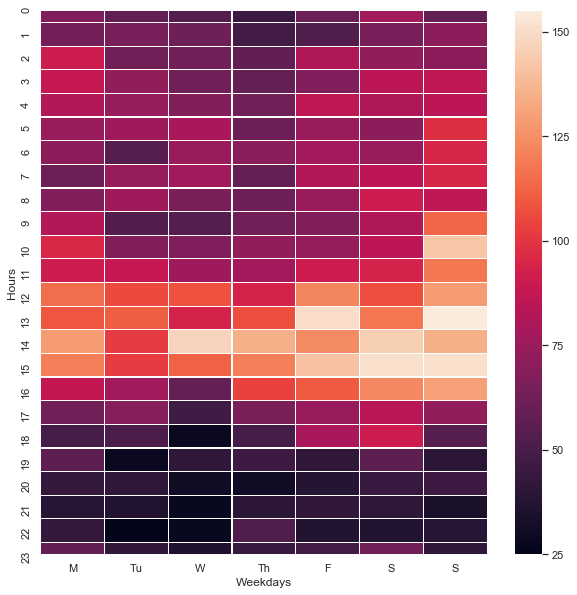

In [979]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(account_created_by_time, linewidth = 0.2)
plt.ylabel('Hours')
plt.xlabel('Weekdays')
plt.show()
plt.rcParams['figure.figsize'] = [16, 10]

In [980]:
out_service_mask = (users.is_out == 'Y') | (users.is_deactivated == 'Y') | (users.is_blocked == 'Y')
users.loc[~out_service_mask]

user_id   birthday gender  photo_count  profile_score profile_tier  \
5      1867735 1991-04-20      F            2          66.50      Diamond   
16     1867776 1994-01-16      F            3          71.97      Diamond   
17     1867781 1998-02-13      F            6          89.21      Diamond   
18     1867783 1987-04-20      F            6          67.71      Diamond   
23     1867807 1989-06-15      F            3          73.99      Diamond   
...        ...        ...    ...          ...            ...          ...   
12709  1920188 1997-01-10      F            3          61.00         Gold   
12710  1920193 1999-08-21      F            5          62.50         Gold   
12711  1920194 1998-12-10      F            2          85.22      Diamond   
12712  1920197 1997-05-10      F            4          65.28      Diamond   
12713  1920213 1997-06-07      F            4          73.97      Diamond   

       bio      characters  height body_type  ...     stage_updated_at  \
5      NaN             NaN   160.0      BF04  ...  2019-02-21 15:11:24   
16     NaN             NaN   167.0      BF01  ...  2019-02-21 15:31:27   
17     NaN  UC08|UC05|UC02   163.0      BF02  ...  2019-02-21 15:30:39   
18     NaN             NaN   130.0      BF02  ...  2019-02-21 15:55:19   
23     NaN             NaN   159.0      BF02  ...  2019-02-21 15:47:07   
...    ...             ...     ...       ...  ...                  ...   
12709  NaN             NaN   155.0      BF05  ...  2019-03-14 15:05:03   
12710  NaN  UC09|UC02|UC16   157.0      BF00  ...  2019-03-14 15:13:18   
12711  NaN  UC04|UC08|UC15   160.0      BF02  ...  2019-03-14 15:17:19   
12712  NaN             NaN   168.0      BF02  ...  2019-03-14 15:07:34   
12713  NaN             NaN   155.0      BF02  ...  2019-03-14 15:05:40   

          last_activity_at age account_created_day account_created_weekday  \
5      2019-03-15 09:04:39  28                  21                       3   
16     2019-03-15 12:02:20  25                  21                       3   
17     2019-03-14 08:30:55  21                  21                       3   
18     2019-03-14 23:19:27  32                  21                       3   
23     2019-03-15 10:40:55  30                  21                       3   
...                    ...  ..                 ...                     ...   
12709  2019-03-15 12:40:40  22                  14                       3   
12710  2019-03-15 02:40:34  20                  14                       3   
12711  2019-03-15 06:52:05  21                  14                       3   
12712  2019-03-15 12:19:33  22                  14                       3   
12713  2019-03-15 11:50:59  22                  14                       3   

      account_created_hour created_to_complete_seconds  \
5                       15                         459   
16                      15                         523   
17                      15                         409   
18                      15                        1857   
23                      15                         584   
...                    ...                         ...   
12709                   14                         730   
12710                   14                        1175   
12711                   14                        1403   
12712                   14                         786   
12713                   14                         431   

      created_to_confirm_seconds confirm_to_complete_seconds reject_counts  
5                          400.0                        59.0           NaN  
16                         164.0                       359.0           NaN  
17                         298.0                       111.0           NaN  
18                         951.0                       906.0           NaN  
23                         515.0                        69.0           NaN  
...                          ...                         ...           ...  
12709               

In [986]:
users.loc[users.stage.notnull(), 'stage'].value_counts()

Review          1256
ProfileEdit      667
Picture          479
Birthday         126
Nickname          74
Location          37
MatchSetting      35
Job               26
Height            13
Body              11
Education          4
Religion           4
Interest           3
Drinking           3
Attraction         2
Smoking            2
Name: stage, dtype: int64

In [987]:
users.sign_up_completed.value_counts()

Y    9973
N    2742
Name: sign_up_completed, dtype: int64

In [988]:
users.columns

Index(['user_id', 'birthday', 'gender', 'photo_count', 'profile_score',
       'profile_tier', 'bio', 'characters', 'height', 'body_type',
       'blood_type', 'education', 'school', 'job', 'company', 'religion',
       'smoking', 'drinking', 'region', 'state', 'locality', 'longitude',
       'latitude', 'current_region', 'language', 'is_out', 'is_deactivated',
       'is_blocked', 'phone_number', 'facebook_email_address',
       'account_created_at', 'is_confirm', 'confirm_admin_id',
       'admin_confirmed_at', 'rating_completed_at', 'sign_up_completed',
       'stage', 'stage_updated_at', 'last_activity_at', 'age',
       'account_created_day', 'account_created_weekday',
       'account_created_hour', 'created_to_complete_seconds',
       'created_to_confirm_seconds', 'confirm_to_complete_seconds',
       'reject_counts'],
      dtype='object')

In [989]:
users.loc[users.is_blocked == 'Y', 'is_confirm'].value_counts()

N    288
Y    278
Name: is_confirm, dtype: int64

#### Blocked

In [990]:
blocked_mask = (users.is_blocked == 'Y') & (users.is_confirm == 'Y')
len(users.loc[blocked_mask])

278

Confirm 되고 Block 된 프로필 중에 Bio를 작성한 프로필을 보면 패턴이 있다

In [991]:
with open('blocked_bio.txt', 'w') as f:
    for text in users.loc[blocked_mask & (users.bio.notnull()), 'bio'].iteritems():
        f.write(str(text) + '\n')

In [992]:
users['created_to_complete_seconds'].describe()

count    12715.000000
mean      4491.989619
std      12518.995705
min          4.000000
25%        427.000000
50%        834.000000
75%       1734.000000
max      86229.000000
Name: created_to_complete_seconds, dtype: float64

In [993]:
users.loc[blocked_mask, 'created_to_complete_seconds'].describe()

count      278.000000
mean     13081.964029
std      22643.924653
min        189.000000
25%        414.250000
50%        789.500000
75%      11698.250000
max      85852.000000
Name: created_to_complete_seconds, dtype: float64

In [994]:
users.groupby(['profile_tier'])['created_to_confirm_seconds'].describe()

count         mean          std    min     25%    50%     75%  \
profile_tier                                                                   
Bronze          18.0  1198.500000  1888.507729  209.0  325.25  483.0  992.75   
Diamond       6476.0  2364.084620  9407.157038   66.0  279.00  418.0  728.25   
Gold          2933.0  2071.600068  8150.493730   82.0  278.00  426.0  765.00   
Silver         861.0  2204.282230  8783.403385  117.0  277.00  431.0  755.00   

                  max  
profile_tier           
Bronze         7773.0  
Diamond       86279.0  
Gold          83238.0  
Silver        85126.0

### Users

#### Churned Profiles

In [1099]:
# Churned Profile
churned_mask = (users.is_confirm.isna()) & (users.reject_counts.isna())
users.loc[churned_mask].stage.value_counts()

Picture         479
Birthday        126
Nickname         74
Location         37
MatchSetting     35
Job              26
Height           13
Body             11
Religion          4
Education         4
Drinking          3
Smoking           2
Name: stage, dtype: int64

#### On Boarding Profiles

In [1200]:
# On Boarding Profile
on_boarding_mask = (users.is_confirm.isna()) & (users.reject_counts.notnull())
on_boarding_users = users.loc[on_boarding_mask]

In [1215]:
rejects.loc[rejects.user_id.isin(on_boarding_users.user_id), ['context', 'reject_id']].groupby('context').agg(len).unstack()

           context         
reject_id  AMP005               273
           AMP017                22
           birthday              38
           gender                20
           height                90
           job                    6
           nickname              14
           picture_0           1189
           picture_1           1268
           picture_2            772
           picture_3            331
           picture_4            240
           picture_5            183
           single                 8
           사진도용은 가입이 불가능합니다       2
dtype: int64

#### Banned Profiles

In [1222]:
# Banned Profile
banned_mask = (users.is_confirm == 'N')
banned_profiles = users.loc[banned_mask]

#### Confirmed Profiles

In [1138]:
# Confirmed Profile
confirmed_mask = (users.is_confirm == 'Y')
confirmed_profiles = users.loc[confirmed_mask]

In [1139]:
confirmed_profiles.confirm_to_complete_seconds.describe()

count    10289.000000
mean      4842.232190
std      16569.482384
min         34.000000
25%        136.000000
50%        311.000000
75%        962.000000
max      86395.000000
Name: confirm_to_complete_seconds, dtype: float64

#### Blocked Profiles

In [1149]:
# Blocked Profile
blocked_mask = (users.is_confirm == 'Y') & (users.is_blocked == 'Y') 
blocked_profiles = users.loc[blocked_mask]

278

In [1148]:
blocked_profiles.profile_score.describe()

count    278.000000
mean      83.607878
std        6.731312
min       55.790000
25%       80.322500
50%       84.840000
75%       87.995000
max       96.640000
Name: profile_score, dtype: float64

In [1151]:
blocked_profiles.loc[blocked_profiles.bio.notnull(), 'bio']

4                     혼자사는데   저랑 술친구 밥친구 톡친구 해요  카톡T886
34                    좋은인연되길 바래요^^\n카.톡: ｎｎｙ３３ 연락 주세요~~
37                        앱 자주안해서  카톡로 대화할까요 ? 카톡 :T886
69                       나이 상관없이 저랑 친구 하실분요\nㄲㅑ 똑: ttu8
71             톡 친구 밥친구 술친구 하실분  같이드라이브해도 좋아해요 카톡 :T886
                              ...                      
11645    자주 확인을 못해요  답장 늦거나   연결이 조금 늦어져도  기다려 주시면 감하행요
12405                               안녕하세요  방가워요 캐뚁 1363
12421                                   모야 이거 어떻게 하는거야ㅠ
12513                 어플 탈퇴할걸라 ㅠㅠ 친하게 지낼분은 톡1994669주세요~
12527      답장이  늦더라도    기다려 주세용  답장늦으면 카톡 199266 추가 주세용
Name: bio, Length: 62, dtype: object

#### Pure Profiles

In [1224]:
pure_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna())
pure_profiles = users.loc[pure_mask]

In [1226]:
pure_profiles.columns

Index(['user_id', 'birthday', 'gender', 'photo_count', 'profile_score',
       'profile_tier', 'bio', 'characters', 'height', 'body_type',
       'blood_type', 'education', 'school', 'job', 'company', 'religion',
       'smoking', 'drinking', 'region', 'state', 'locality', 'longitude',
       'latitude', 'current_region', 'language', 'is_out', 'is_deactivated',
       'is_blocked', 'phone_number', 'facebook_email_address',
       'account_created_at', 'is_confirm', 'confirm_admin_id',
       'admin_confirmed_at', 'rating_completed_at', 'sign_up_completed',
       'stage', 'stage_updated_at', 'last_activity_at', 'age',
       'account_created_day', 'account_created_weekday',
       'account_created_hour', 'created_to_complete_seconds',
       'created_to_confirm_seconds', 'confirm_to_complete_seconds',
       'reject_counts'],
      dtype='object')

In [1228]:
pd.DatetimeIndex(pure_profiles.last_activity_at) - pd.DatetimeIndex(pure_profiles.account_created_at)

TimedeltaIndex([ '0 days 00:38:09',  '0 days 01:07:54',  '0 days 00:14:53',
                 '0 days 00:44:59', '21 days 18:00:54', '10 days 02:39:50',
                 '2 days 15:01:23',  '9 days 20:52:28',  '0 days 02:47:29',
                 '0 days 01:00:54',
                ...
                 '0 days 21:33:59',  '0 days 09:02:59',  '0 days 21:53:22',
                 '0 days 00:35:16',  '0 days 21:47:47',  '0 days 11:46:51',
                 '0 days 15:58:09',  '0 days 21:25:05',  '0 days 20:52:30',
                 '0 days 00:18:31'],
               dtype='timedelta64[ns]', length=10011, freq=None)

#### Deactivated Profiles

In [1178]:
deactivated_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna()) & (users.is_deactivated == 'Y')
users.loc[deactivated_mask]

user_id   birthday gender  photo_count  profile_score profile_tier  bio  \
0     1867728 1997-02-06      F            6          59.98         Gold  NaN   
1     1867729 1999-06-14      F            3          49.67       Silver  NaN   
2     1867731 2000-06-16      F            4          66.88      Diamond  NaN   
3     1867733 1997-10-01      F            6          54.04         Gold  NaN   
7     1867742 1984-01-10      F            6          54.53         Gold  NaN   
...       ...        ...    ...          ...            ...          ...  ...   
9689  1906349 1984-03-22      F            2          57.04         Gold  NaN   
9694  1906369 1996-03-14      F            3          66.32      Diamond  NaN   
9697  1906380 1997-01-27      F            5          55.48         Gold  NaN   
9707  1906411 1997-01-05      F            2          69.93      Diamond  NaN   
9721  1906448 1998-01-20      F            3          70.47      Diamond  NaN   

     characters  height body_type  ...     stage_updated_at  \
0           NaN   156.0      BF01  ...  2019-02-21 15:26:14   
1           NaN   160.0      BF05  ...  2019-02-21 15:26:55   
2           NaN   161.0      BF00  ...  2019-02-21 15:12:34   
3           NaN   161.0      BF05  ...  2019-02-21 15:36:38   
7           NaN   170.0      BF02  ...  2019-02-21 15:20:27   
...         ...     ...       ...  ...                  ...   
9689        NaN   163.0      BF02  ...  2019-03-09 14:16:18   
9694        NaN   157.0      BF02  ...  2019-03-09 14:28:40   
9697        NaN   163.0      BF02  ...  2019-03-09 14:16:29   
9707        NaN   163.0      BF05  ...  2019-03-09 14:29:15   
9721        NaN   160.0      BF01  ...  2019-03-09 14:48:55   

         last_activity_at age account_created_day account_created_weekday  \
0     2019-02-21 15:38:31  22                  21                       3   
1     2019-02-21 16:08:26  20                  21                       3   
2     2019-02-21 15:16:44  19                  21                       3   
3     2019-02-21 15:47:52  22                  21                       3   
7     2019-03-03 17:47:05  35                  21                       3   
...                   ...  ..                 ...                     ...   
9689  2019-03-09 14:34:48  35                   9                       5   
9694  2019-03-09 14:46:54  23                   9                       5   
9697  2019-03-09 14:25:33  22                   9                       5   
9707  2019-03-09 14:34:50  22                   9                       5   
9721  2019-03-09 14:55:41  21                   9                       5   

     account_created_hour created_to_complete_seconds  \
0                      15                        1552   
1                      15                        1583   
2                      15                         643   
3                      15                        2025   
7                      15                         792   
...                   ...                         ...   
9689                   13                        1034   
9694                   14                        1415   
9697                   14                         439   
9707                   14                         528   
9721                   14                        1057   

     created_to_confirm_seconds confirm_to_complete_seconds reject_counts  
0                         974.0                       578.0           NaN  
1                        1488.0                        95.0           1.0  
2                         492.0                       151.0           NaN  
3                         817.0                      1208.0           NaN  
7                         542.0                       250.0           NaN  
...                         ...                         ...           ...  
9689                      937.0                        97.0           1.0  
9694                      575.0                       840.

#### Turn Over Profiles

In [1179]:
turnover_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna()) & (users.is_out == 'Y')
users.loc[turnover_mask]

user_id   birthday gender  photo_count  profile_score profile_tier  \
0      1867728 1997-02-06      F            6          59.98         Gold   
1      1867729 1999-06-14      F            3          49.67       Silver   
2      1867731 2000-06-16      F            4          66.88      Diamond   
3      1867733 1997-10-01      F            6          54.04         Gold   
7      1867742 1984-01-10      F            6          54.53         Gold   
...        ...        ...    ...          ...            ...          ...   
12690  1920098 1991-08-27      F            5          80.92      Diamond   
12698  1920135 1998-03-03      F            3          55.81         Gold   
12703  1920159 1998-03-16      F            4          81.94      Diamond   
12706  1920174 1989-09-26      F            2          77.09      Diamond   
12714  1920216 1996-05-05      F            2          90.56      Diamond   

       bio      characters  height body_type  ...     stage_updated_at  \
0      NaN             NaN   156.0      BF01  ...  2019-02-21 15:26:14   
1      NaN             NaN   160.0      BF05  ...  2019-02-21 15:26:55   
2      NaN             NaN   161.0      BF00  ...  2019-02-21 15:12:34   
3      NaN             NaN   161.0      BF05  ...  2019-02-21 15:36:38   
7      NaN             NaN   170.0      BF02  ...  2019-02-21 15:20:27   
...    ...             ...     ...       ...  ...                  ...   
12690  NaN  UC02|UC08|UC05   163.0      BF02  ...  2019-03-14 14:29:01   
12698  NaN             NaN   165.0      BF05  ...  2019-03-14 14:40:51   
12703  NaN             NaN   168.0      BF02  ...  2019-03-14 14:50:02   
12706  NaN             NaN   162.0      BF02  ...  2019-03-14 15:27:28   
12714  NaN             NaN   164.0      BF01  ...  2019-03-14 15:05:25   

          last_activity_at age account_created_day account_created_weekday  \
0      2019-02-21 15:38:31  22                  21                       3   
1      2019-02-21 16:08:26  20                  21                       3   
2      2019-02-21 15:16:44  19                  21                       3   
3      2019-02-21 15:47:52  22                  21                       3   
7      2019-03-03 17:47:05  35                  21                       3   
...                    ...  ..                 ...                     ...   
12690  2019-03-14 15:16:34  28                  14                       3   
12698  2019-03-14 14:55:03  21                  14                       3   
12703  2019-03-14 23:14:28  21                  14                       3   
12706  2019-03-14 23:51:31  30                  14                       3   
12714  2019-03-14 15:18:24  23                  14                       3   

      account_created_hour created_to_complete_seconds  \
0                       15                        1552   
1                       15                        1583   
2                       15                         643   
3                       15                        2025   
7                       15                         792   
...                    ...                         ...   
12690                   14                         600   
12698                   14                         472   
12703                   14                         438   
12706                   14                        2336   
12714                   14                         332   

      created_to_confirm_seconds confirm_to_complete_seconds reject_counts  
0                          974.0                       578.0           NaN  
1                         1488.0                        95.0           1.0  
2                          492.0                       151.0           NaN  
3                          817.0                      1208.0           NaN  
7                          542.0                       250.0           NaN  
...                          ...                         ...           ...  
12690               

In [1180]:
temp_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna()) & (users.is_out == 'Y') & (users.is_deactivated == 'Y')
users.loc[temp_mask]

user_id   birthday gender  photo_count  profile_score profile_tier  bio  \
0     1867728 1997-02-06      F            6          59.98         Gold  NaN   
1     1867729 1999-06-14      F            3          49.67       Silver  NaN   
2     1867731 2000-06-16      F            4          66.88      Diamond  NaN   
3     1867733 1997-10-01      F            6          54.04         Gold  NaN   
7     1867742 1984-01-10      F            6          54.53         Gold  NaN   
...       ...        ...    ...          ...            ...          ...  ...   
9684  1906335 1998-10-29      F            3          66.40      Diamond  NaN   
9689  1906349 1984-03-22      F            2          57.04         Gold  NaN   
9697  1906380 1997-01-27      F            5          55.48         Gold  NaN   
9707  1906411 1997-01-05      F            2          69.93      Diamond  NaN   
9721  1906448 1998-01-20      F            3          70.47      Diamond  NaN   

     characters  height body_type  ...     stage_updated_at  \
0           NaN   156.0      BF01  ...  2019-02-21 15:26:14   
1           NaN   160.0      BF05  ...  2019-02-21 15:26:55   
2           NaN   161.0      BF00  ...  2019-02-21 15:12:34   
3           NaN   161.0      BF05  ...  2019-02-21 15:36:38   
7           NaN   170.0      BF02  ...  2019-02-21 15:20:27   
...         ...     ...       ...  ...                  ...   
9684        NaN   159.0      BF02  ...  2019-03-09 14:04:03   
9689        NaN   163.0      BF02  ...  2019-03-09 14:16:18   
9697        NaN   163.0      BF02  ...  2019-03-09 14:16:29   
9707        NaN   163.0      BF05  ...  2019-03-09 14:29:15   
9721        NaN   160.0      BF01  ...  2019-03-09 14:48:55   

         last_activity_at age account_created_day account_created_weekday  \
0     2019-02-21 15:38:31  22                  21                       3   
1     2019-02-21 16:08:26  20                  21                       3   
2     2019-02-21 15:16:44  19                  21                       3   
3     2019-02-21 15:47:52  22                  21                       3   
7     2019-03-03 17:47:05  35                  21                       3   
...                   ...  ..                 ...                     ...   
9684  2019-03-09 14:07:02  21                   9                       5   
9689  2019-03-09 14:34:48  35                   9                       5   
9697  2019-03-09 14:25:33  22                   9                       5   
9707  2019-03-09 14:34:50  22                   9                       5   
9721  2019-03-09 14:55:41  21                   9                       5   

     account_created_hour created_to_complete_seconds  \
0                      15                        1552   
1                      15                        1583   
2                      15                         643   
3                      15                        2025   
7                      15                         792   
...                   ...                         ...   
9684                   13                         560   
9689                   13                        1034   
9697                   14                         439   
9707                   14                         528   
9721                   14                        1057   

     created_to_confirm_seconds confirm_to_complete_seconds reject_counts  
0                         974.0                       578.0           NaN  
1                        1488.0                        95.0           1.0  
2                         492.0                       151.0           NaN  
3                         817.0                      1208.0           NaN  
7                         542.0                       250.0           NaN  
...                         ...                         ...           ...  
9684                      438.0                       122.0           NaN  
9689                      937.0                        97.

#### Active Profiles

In [1183]:
len(users)

12715

In [1181]:
active_mask = (users.is_out == 'N') & (users.is_deactivated == 'N') & (users.is_confirm == 'Y') & (users.is_blocked != 'Y')
active_users = users.loc[active_mask]

In [1182]:
active_users.created_to_confirm_seconds.describe()

count     3854.000000
mean      2730.092631
std      10053.708125
min        100.000000
25%        297.000000
50%        453.500000
75%        804.750000
max      86067.000000
Name: created_to_confirm_seconds, dtype: float64

In [1060]:
active_users.reject_counts.describe()

count    813.000000
mean       1.565806
std        1.348110
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
Name: reject_counts, dtype: float64

In [1067]:
users.loc[users.is_blocked == 'Y', 'reject_counts'].describe()

count    68.000000
mean      3.117647
std       4.533555
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      27.000000
Name: reject_counts, dtype: float64